# Classification and prediction of ASD  
<br>

## Models with the SRS/IQ/BRIEF dataset

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
ASD_df1 = pd.read_csv('ASD_df1.csv')

In [3]:
ASD_df1.head()

,DX_GROUP,SEX,FIQ,VIQ,SRS_INFORMANT,SRS_TOTAL_RAW,SRS_AWARENESS_RAW,SRS_COGNITION_RAW,SRS_COMMUNICATION_RAW,SRS_MOTIVATION_RAW,...,BRIEF_EMOTIONAL_T,BRIEF_BRI_T,BRIEF_INITIATE_T,BRIEF_WORKING_T,BRIEF_PLAN_T,BRIEF_ORGANIZATION_T,BRIEF_MONITOR_T,BRIEF_MI_T,BRIEF_GEC_T,AGE
0,1,1,116.0,114.0,8.0,105.0,15.0,17.0,38.0,10.0,...,56.0,66.0,59.0,71.0,63.0,57.0,72.0,67.0,68.0,13.076712
1,1,1,117.0,124.0,8.0,41.0,5.0,8.0,12.0,11.0,...,65.0,58.0,56.0,58.0,42.0,71.0,44.0,54.0,56.0,9.298630
2,1,2,134.0,124.0,8.0,100.0,16.0,17.0,34.0,14.0,...,49.0,60.0,69.0,72.0,72.0,70.0,76.0,75.0,71.0,12.490411
3,1,2,101.0,110.0,8.0,142.0,19.0,21.0,50.0,22.0,...,71.0,72.0,81.0,81.0,82.0,69.0,72.0,81.0,79.0,9.868493
4,1,1,128.0,134.0,8.0,46.0,7.0,8.0,15.0,8.0,...,61.0,55.0,65.0,51.0,58.0,66.0,66.0,62.0,61.0,11.484932


In [4]:
ASD_df1.shape

(444, 29)

---
# Summary 


1. Split the dataset into Train/Test
2. Explore the dataset with PCA dimensionnality reduction 
3. Create a Baseline to evaluate my models 
4. Models with GridSearchCV
    * 1. Decision tree
    * 2. Random forest
    * 3. kNN
    * 4. SVC
5. Dataframe with models and conclusion
---

In [5]:
ASD_df1.info() # Looks good !!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 29 columns):
DX_GROUP                 444 non-null int64
SEX                      444 non-null int64
FIQ                      444 non-null float64
VIQ                      444 non-null float64
SRS_INFORMANT            444 non-null float64
SRS_TOTAL_RAW            444 non-null float64
SRS_AWARENESS_RAW        444 non-null float64
SRS_COGNITION_RAW        444 non-null float64
SRS_COMMUNICATION_RAW    444 non-null float64
SRS_MOTIVATION_RAW       444 non-null float64
SRS_MANNERISMS_RAW       444 non-null float64
SRS_TOTAL_T              444 non-null float64
SRS_AWARENESS_T          444 non-null float64
SRS_COGNITION_T          444 non-null float64
SRS_COMMUNICATION_T      444 non-null float64
SRS_MOTIVATION_T         444 non-null float64
SRS_MANNERISMS_T         444 non-null float64
BRIEF_INHIBIT_T          444 non-null float64
BRIEF_SHIFT_T            444 non-null float64
BRIEF_EMOTIONAL_T        

## 1. Train/Test split

In [6]:
from sklearn.model_selection import train_test_split

# Create X and y arrays for my analysis
X = ASD_df1.drop(['DX_GROUP'], axis=1).values
y = ASD_df1.DX_GROUP.values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=14)

print('X train:', X_tr.shape)
print('X test:', X_te.shape)
print('y train:', y_tr.shape)
print('y test:', y_te.shape)

print('ASD in the test data:', (y_te == 1).sum())
print('Control in the test data:', (y_te == 2).sum())

X train: (355, 28)
X test: (89, 28)
y train: (355,)
y test: (89,)
ASD in the test data: 42
Control in the test data: 47


In [7]:
# Check the age of the target to be sure that not all the control are old 

print('Age of train control: {:.2f}'.format(X_tr[(y_tr == 2), -1].mean())) # Mean age of control
print('Age of train asd: {:.2f}'.format(X_tr[(y_tr == 1), -1].mean())) # Mean age of asd

print('Age of test control: {:.2f}'.format(X_te[(y_te == 2), -1].mean())) # Mean age of control
print('Age of test asd: {:.2f}'.format(X_te[(y_te == 1), -1].mean())) # Mean age of asd

Age of train control: 10.48
Age of train asd: 9.99
Age of test control: 10.42
Age of test asd: 10.62


In [8]:
# Check the sex of the target to be sure not all the control are one of both 
# 1 = male, 2 = female

print('Male and ASD: {:.2f}'.format(((((X_tr[:,0]==1) & (y_tr == 1)).sum())/len(X_tr))))
print('Male and Control: {:.2f}'.format(((((X_tr[:,0]==1) & (y_tr == 2)).sum())/len(X_tr))))
print('Female and ASD: {:.2f}'.format(((((X_tr[:,0]==2) & (y_tr == 1)).sum())/len(X_tr))))
print('Female and Control: {:.2f}'.format(((((X_tr[:,0]==2) & (y_tr == 2)).sum())/len(X_tr))))

print()
print('---- TEST SET ----')
print('Male and ASD: {:.2f}'.format(((((X_te[:,0]==1) & (y_te == 1)).sum())/len(X_te))))
print('Male and control: {:.2f}'.format(((((X_te[:,0]==1) & (y_te == 2)).sum())/len(X_te))))
print('Female and ASD: {:.2f}'.format(((((X_te[:,0]==2) & (y_te == 1)).sum())/len(X_te))))
print('Female and control: {:.2f}'.format(((((X_te[:,0]==2) & (y_te == 2)).sum())/len(X_te))))

Male and ASD: 0.34
Male and Control: 0.37
Female and ASD: 0.09
Female and Control: 0.19

---- TEST SET ----
Male and ASD: 0.44
Male and control: 0.38
Female and ASD: 0.03
Female and control: 0.15


## 2. PCA plotting of my dataset

In [9]:
from sklearn.preprocessing import StandardScaler

# Transform X_tr
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr, y_tr)

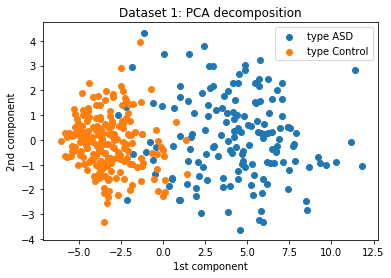

In [10]:
from sklearn.decomposition import PCA

# Create PCA transformer
pca = PCA(n_components=2)

X_2d = pca.fit_transform(X_tr_rescaled);


for groups in [1, 2]:
    idx = (y_tr == groups)
    
    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'

    # Plot their components
    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1],
        label='type {}'.format(groups)
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('Dataset 1: PCA decomposition')
plt.show()

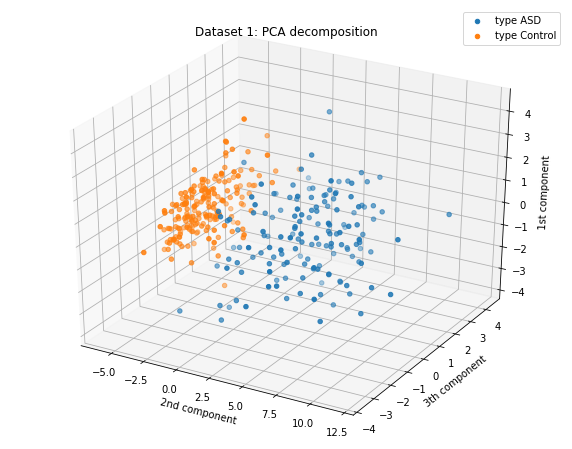

In [11]:
from mpl_toolkits.mplot3d import axes3d
from sklearn.decomposition import PCA

# Create PCA transformer
pca = PCA(n_components=3)

X_3d = pca.fit_transform(X_tr_rescaled);

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line

for groups in [1, 2]:
    
    idx = (y_tr == groups)
    
    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'
    
    ax.scatter3D(
        X_3d[idx, 0], X_3d[idx, 1], X_3d[idx, 2],
        label='type {}'.format(groups), marker='o'
    )
    
plt.legend()
ax.set_zlabel('1st component')
ax.set_xlabel('2nd component')
ax.set_ylabel('3th component')
plt.title('Dataset 1: PCA decomposition')
plt.show()

In [12]:
# Try to see how much component we need with PCA

# Create PCA transformer
pca = PCA(n_components=None)

# Apply PCA to rescaled data
X_pca_rescaled = pca.fit_transform(X_tr_rescaled)

# Proportion of variance explained
pca.explained_variance_ratio_;

In [13]:
pve = pca.explained_variance_ratio_

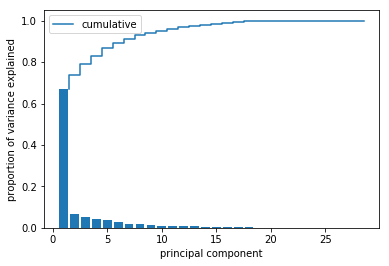

In [14]:
# Create bar plot
xcor = np.arange(1, len(pve) + 1) # 1,2,..,n_components
plt.bar(xcor, pve)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor+0.5, # 1.5,2.5,..,n_components+0.5
    pve_cumsum, # Cumulative sum
    label='cumulative'
)

# Add labels
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained')
plt.legend()
plt.show()

In [15]:
## Number of pca is the dataset to run with grid

n = len(X_tr[0])

list_pca = list(range(2,n))
list_pca.insert(0,None)

# Create a dict to store the results of my models
models_acc = dict()

## 3. Create a Baseline to evaluate my models

Since we are working here with a binary classification model I will use the 'most frequent' baseline.

In [16]:
from sklearn.dummy import DummyClassifier

# Create the dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

# Fit it
dummy.fit(None, y_tr)

# Compute test accuracy
baseline_accuracy = dummy.score(None, y_te)
print('Test accuracy baseline: {:.2f}%'.format(100*baseline_accuracy))

models_acc['baseline'] = 100*baseline_accuracy

Test accuracy baseline: 52.81%


In [17]:
# Function to plot my confusion matrix
# code taken at https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

---
---

# 4. Models 
<br>
<br>

## A. Decision tree:

* I will fit and plot a first decision tree since they are the most easy models to read. <br>
* I will then implement a GridSearchCV to tune the parameters of the Decision tree.

0.9325842696629213


C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\sklearn\preprocessing\data.py:765: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)


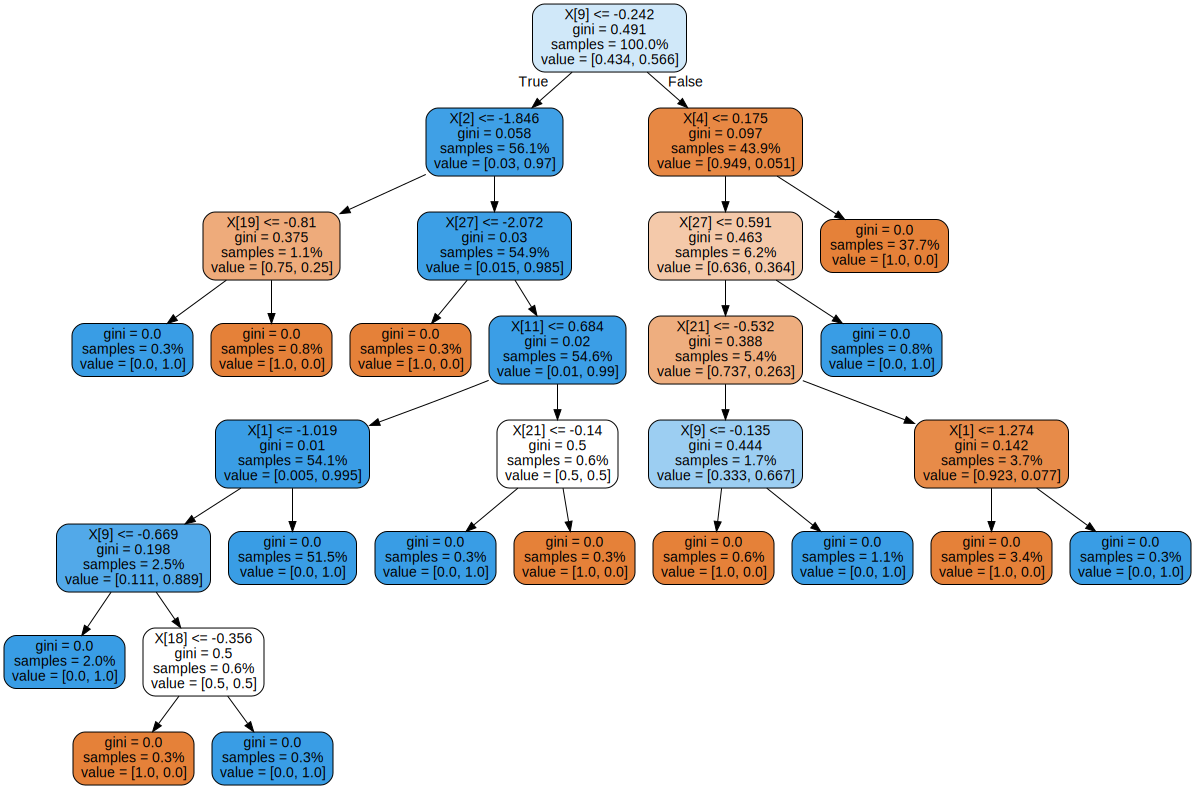

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz
import graphviz

scaler = StandardScaler()

# Transform X_tr
X_tr_rescaled = scaler.fit_transform(X_tr, y_tr)

# Create dt and fit it to tr
dt = DecisionTreeClassifier(criterion='gini', max_depth=None)
dt.fit(X_tr_rescaled, y_tr)

# scale te
X_te_rescaled = scaler.transform(X_te, y_te)
# look at the score 
print(dt.score(X_te_rescaled, y_te))

# export decision tree
dot_data = export_graphviz(dt, out_file=None, filled=True,
                          rounded=True, proportion=True)


# Display decision tree
graphviz.Source(dot_data)

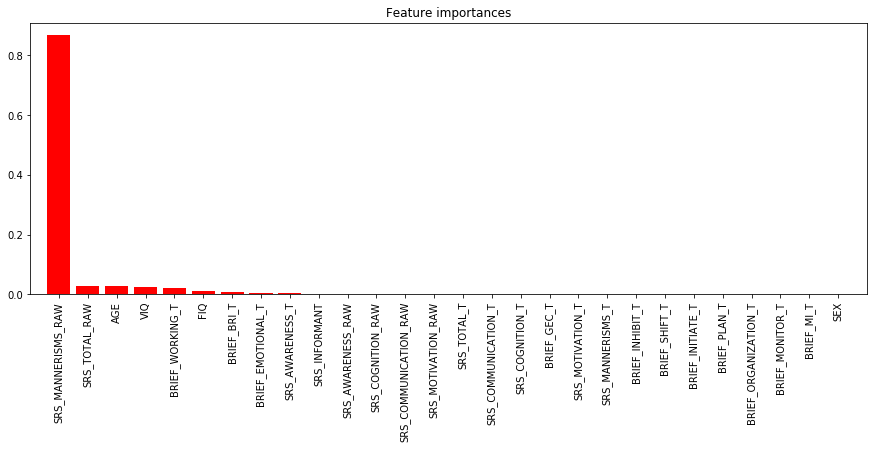

In [19]:
# look at the features importance  

features = dt.feature_importances_
indices = np.argsort(features)[::-1]

names = ASD_df1.drop(['DX_GROUP'], axis=1).copy()
names_ind = names.columns[indices]
names_ind

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(X_tr.shape[1]), features[indices],
        color="r", align="center")
plt.xticks(range(X_tr.shape[1]), names_ind, rotation='vertical')
plt.xlim([-1, X_tr.shape[1]])
plt.show()

## Decision tree model with GridsearchCV

Parameters:
* Scaler : None/scaler
* PCA reduction : n components
* tree : max depth ?

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('dt', DecisionTreeClassifier(criterion='gini',
                                    random_state=0))
])


param_grid={
    'scaler':[None, StandardScaler()],
    'pca__n_components':list_pca,
    'dt__max_depth':np.arange(1,30),
}

dt_gdcv = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1, verbose=1, return_train_score=True)

dt_gdcv.fit(X_tr, y_tr);

dt_results = pd.DataFrame({
    'scaler':dt_gdcv.cv_results_['param_scaler'],
    'PCA': dt_gdcv.cv_results_['param_pca__n_components'],
    'tree_depth':dt_gdcv.cv_results_['param_dt__max_depth'],
    'mean_tr': dt_gdcv.cv_results_['mean_train_score'],
    'mean_te': dt_gdcv.cv_results_['mean_test_score'],
    'std_te': dt_gdcv.cv_results_['std_test_score']
})

dt_results.sort_values(by='mean_te', ascending=False).head(5)

Fitting 5 folds for each of 1566 candidates, totalling 7830 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 2377 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 7377 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 7830 out of 7830 | elapsed:   20.0s finished
C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,scaler,PCA,tree_depth,mean_tr,mean_te,std_te
47,"StandardScaler(copy=True, with_mean=True, with...",24,1,0.952127,0.952113,0.042034
15,"StandardScaler(copy=True, with_mean=True, with...",8,1,0.952127,0.952113,0.042034
27,"StandardScaler(copy=True, with_mean=True, with...",14,1,0.952127,0.952113,0.042034
53,"StandardScaler(copy=True, with_mean=True, with...",27,1,0.952127,0.952113,0.042034
25,"StandardScaler(copy=True, with_mean=True, with...",13,1,0.952127,0.952113,0.042034


#### Classification report :
* PRECISION : How many times are we correct when we predict positive?
* RECALL : How many times do we predict positive when it is?
* F1 SCORE : The F1 score is a way to combine the precision and recall metrics into a single score.

Test accuracy decision tree model: 94.38%
              precision    recall  f1-score   support

           1       0.95      0.93      0.94        42
           2       0.94      0.96      0.95        47

   micro avg       0.94      0.94      0.94        89
   macro avg       0.94      0.94      0.94        89
weighted avg       0.94      0.94      0.94        89



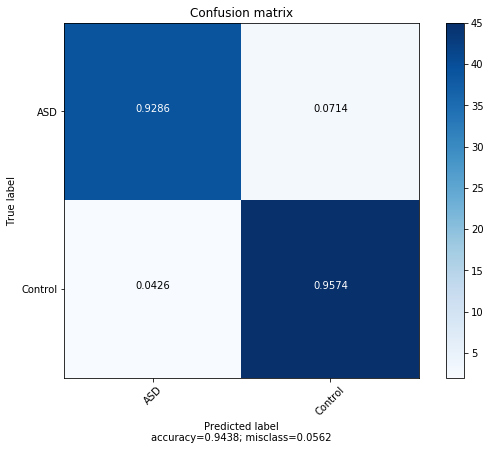

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Test accuracy decision tree model: {:.2f}%'.format(100*dt_gdcv.score(X_te, y_te)))
models_acc['Decision tree'] = 100*dt_gdcv.score(X_te, y_te)

y_pred = dt_gdcv.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

---

## B. Random forest model with GridsearchCV

Parameters:
* Scaler : None/scaler
* PCA reduction : n components
* n_estimators : number of trees

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Pipeline with gridsearch of components and number of trees

random_f = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('rf', RandomForestClassifier(n_jobs=-1,
                                  verbose=1,
                                  random_state=9
    ))
])

param_grid={
    'scaler':[None, StandardScaler()],
    'pca__n_components':list_pca,
    'rf__n_estimators':np.arange(1,501, 50),
}

rf_gdcv = GridSearchCV(random_f, param_grid, cv=5, n_jobs=-1, verbose=2, return_train_score=True)

rf_gdcv.fit(X_tr, y_tr);

rf_results = pd.DataFrame({
    'scaler':rf_gdcv.cv_results_['param_scaler'],
    'PCA': rf_gdcv.cv_results_['param_pca__n_components'],
    'trees': rf_gdcv.cv_results_['param_rf__n_estimators'],
    'mean_tr': rf_gdcv.cv_results_['mean_train_score'],
    'mean_te': rf_gdcv.cv_results_['mean_test_score'],
    'std_te': rf_gdcv.cv_results_['std_test_score']
})

rf_results.sort_values(by='mean_te', ascending=False).head(5)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  9.0min finished
C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend

,scaler,PCA,trees,mean_tr,mean_te,std_te
8,None,None,201,1.0,0.960563,0.024049
416,None,21,401,1.0,0.957746,0.030634
414,None,21,351,1.0,0.957746,0.030634
406,None,21,151,1.0,0.957746,0.030634
10,None,None,251,1.0,0.957746,0.028012


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 201 out of 201 | elapsed:    0.0s finished


Test accuracy random forest model: 94.38%
              precision    recall  f1-score   support

           1       0.97      0.90      0.94        42
           2       0.92      0.98      0.95        47

   micro avg       0.94      0.94      0.94        89
   macro avg       0.95      0.94      0.94        89
weighted avg       0.95      0.94      0.94        89



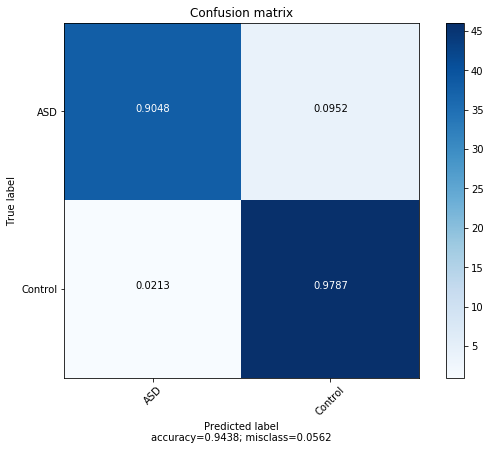

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Test accuracy random forest model: {:.2f}%'.format(100*rf_gdcv.score(X_te, y_te)))

y_pred = rf_gdcv.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

### Refine model with searched parameters


In [24]:
print('Best score:', rf_gdcv.best_score_)
print('Best estimator:', rf_gdcv.best_estimator_)
print('Best params:', rf_gdcv.best_params_)

Best score: 0.9605633802816902
Best estimator: Pipeline(memory=None,
     steps=[('scaler', None), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_node...timators=201, n_jobs=-1,
            oob_score=False, random_state=9, verbose=1, warm_start=False))])
Best params: {'pca__n_components': None, 'rf__n_estimators': 201, 'scaler': None}


In [25]:
random_f_refined = Pipeline([
#     ('scaler', scaler),
#     ('pca', PCA(n_components=pca)),
    ('rf', RandomForestClassifier(n_jobs=-1,
                                  verbose=1,
                                  random_state=9
    ))
])

grid_refine={
    'rf__n_estimators':np.arange(151, 251),
}


rf_gdcv_ref = GridSearchCV(random_f_refined, grid_refine, cv=5, n_jobs=-1, verbose=2, return_train_score=True)

rf_gdcv_ref.fit(X_tr, y_tr);

rf_results_ref = pd.DataFrame({
    'trees': rf_gdcv_ref.cv_results_['param_rf__n_estimators'],
    'mean_tr': rf_gdcv_ref.cv_results_['mean_train_score'],
    'mean_te': rf_gdcv_ref.cv_results_['mean_test_score'],
    'std_te': rf_gdcv_ref.cv_results_['std_test_score']
})

rf_results_ref.sort_values(by='mean_te', ascending=False).head(5)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed:    0.1s finished


,trees,mean_tr,mean_te,std_te
81,232,1.0,0.949296,0.025954
50,201,1.0,0.946479,0.027149
64,215,1.0,0.946479,0.027149
73,224,1.0,0.946479,0.027149
72,223,1.0,0.946479,0.027149


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 232 out of 232 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Test accuracy random forest model: 95.51%


[Parallel(n_jobs=8)]: Done 232 out of 232 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 232 out of 232 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           1       0.97      0.93      0.95        42
           2       0.94      0.98      0.96        47

   micro avg       0.96      0.96      0.96        89
   macro avg       0.96      0.95      0.95        89
weighted avg       0.96      0.96      0.95        89



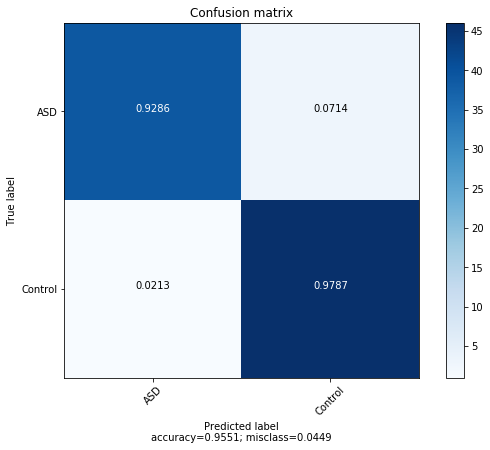

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Test accuracy random forest model: {:.2f}%'.format(100*rf_gdcv_ref.score(X_te, y_te)))
models_acc['Random forest'] = 100*rf_gdcv_ref.score(X_te, y_te)

y_pred = rf_gdcv_ref.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 232 out of 232 | elapsed:    0.0s finished


Test accuracy random forest model: 95.51%



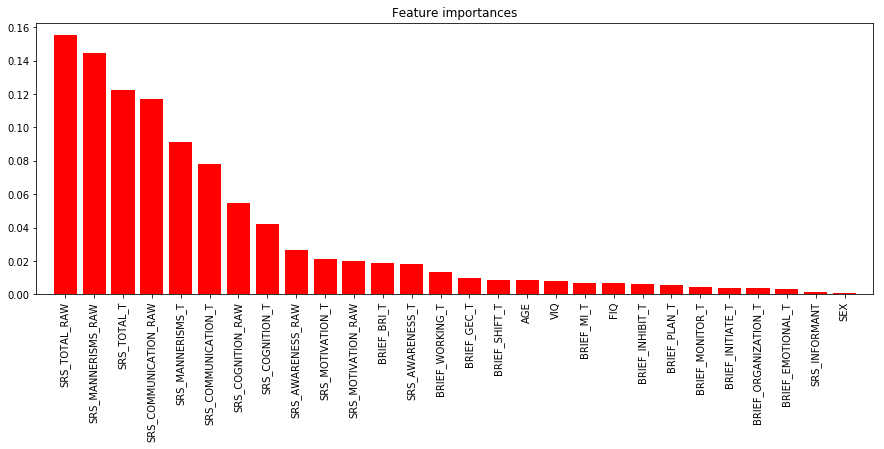

In [27]:
# Plot important features 

forest = RandomForestClassifier(n_jobs=-1,
                                  verbose=1,
                                  random_state=9,
                               n_estimators=232)

forest.fit(X_tr, y_tr)

print('Test accuracy random forest model: {:.2f}%'.format(100*forest.score(X_te, y_te)))
print()

# Plot the most important features 

features = forest.feature_importances_
indices = np.argsort(features)[::-1]

names = ASD_df1.drop(['DX_GROUP'], axis=1).copy()
names_ind = names.columns[indices]
names_ind

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(X_tr.shape[1]), features[indices],
        color="r", align="center")
plt.xticks(range(X_tr.shape[1]), names_ind, rotation='vertical')
plt.xlim([-1, X_tr.shape[1]])
plt.show()

---

## C. kNN model with GridsearchCV

Parameters:
* Scaler : None/scaler
* PCA reduction : n components
* n_neighbors : Number of neighbors to use 
* weights : weight function used in prediction
* p : Power parameter for the Minkowski metric

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Pipeline with gridsearch of componenent and number of k Neighboors 

k_nn = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier(n_jobs=-1
    ))
])

param_grid={
    'scaler':[None, StandardScaler()],
    'pca__n_components':list_pca,
    'knn__n_neighbors':np.arange(1,101, 10),
    'knn__weights':['uniform', 'distance'],
    'knn__p':[1, 2]
}

k_nn_gdcv = GridSearchCV(k_nn, param_grid, cv=5, n_jobs=-1, verbose=1, return_train_score=True)

k_nn_gdcv.fit(X_tr, y_tr);

knn_results = pd.DataFrame({
    'scaler':k_nn_gdcv.cv_results_['param_scaler'],
    'PCA': k_nn_gdcv.cv_results_['param_pca__n_components'],
    'k': k_nn_gdcv.cv_results_['param_knn__n_neighbors'],
    'p': k_nn_gdcv.cv_results_['param_knn__p'],
    'weights': k_nn_gdcv.cv_results_['param_knn__weights'],
    'mean_tr': k_nn_gdcv.cv_results_['mean_train_score'],
    'mean_te': k_nn_gdcv.cv_results_['mean_test_score'],
    'std_te': k_nn_gdcv.cv_results_['std_test_score']
})

knn_results.sort_values(by='mean_te', ascending=False).head(5)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 10800 out of 10800

,scaler,PCA,k,p,weights,mean_tr,mean_te,std_te
569,"StandardScaler(copy=True, with_mean=True, with...",15,21,2,uniform,0.952125,0.952113,0.042865
867,"StandardScaler(copy=True, with_mean=True, with...",2,41,1,uniform,0.947907,0.952113,0.043875
1306,None,6,61,1,uniform,0.950714,0.952113,0.031313
591,"StandardScaler(copy=True, with_mean=True, with...",26,21,2,uniform,0.951421,0.952113,0.042865
645,"StandardScaler(copy=True, with_mean=True, with...",26,21,2,distance,1.000000,0.952113,0.042865


Test accuracy: 95.51%

              precision    recall  f1-score   support

           1       0.97      0.93      0.95        42
           2       0.94      0.98      0.96        47

   micro avg       0.96      0.96      0.96        89
   macro avg       0.96      0.95      0.95        89
weighted avg       0.96      0.96      0.95        89



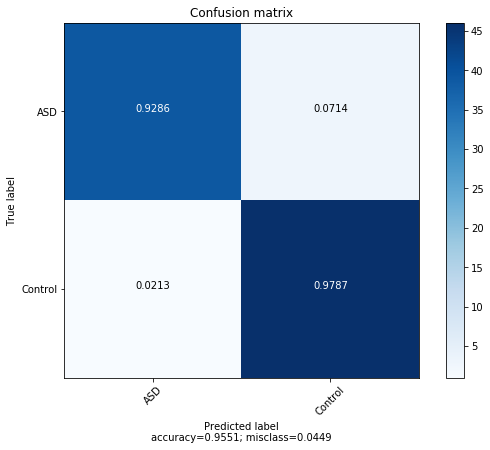

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Test accuracy: {:.2f}%'.format(100*k_nn_gdcv.score(X_te, y_te)))
print()

y_pred = k_nn_gdcv.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

### Refine my search to find the optimal k

In [30]:
print('Best score:', k_nn_gdcv.best_score_)
print('Best estimator:', k_nn_gdcv.best_estimator_)
print('Best params:', k_nn_gdcv.best_params_)

Best score: 0.952112676056338
Best estimator: Pipeline(memory=None,
     steps=[('scaler', None), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=11, p=1,
           weights='uniform'))])
Best params: {'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'uniform', 'pca__n_components': 2, 'scaler': None}


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Pipeline with gridsearch of componenent and number of k Neighboors 

knn_ref = Pipeline([
#     ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('knn', KNeighborsClassifier(n_jobs=-1,
                                 p=1,
                                 weights='uniform'
    ))
])

grid_refined={
#     'scaler':[None, StandardScaler()],
#     'pca__n_components':list_pca,
    'knn__n_neighbors':np.arange(1,21),
#     'knn__weights':['uniform', 'distance'],
#     'knn__p':[1, 2]
}

k_nn_gdcv_ref = GridSearchCV(knn_ref, grid_refined, cv=5, n_jobs=-1, verbose=1, return_train_score=True)

k_nn_gdcv_ref.fit(X_tr, y_tr);

knn_results_ref = pd.DataFrame({
#     'scaler':k_nn_gdcv_ref.cv_results_['param_scaler'],
#     'PCA': k_nn_gdcv_ref.cv_results_['param_pca__n_components'],
    'k': k_nn_gdcv_ref.cv_results_['param_knn__n_neighbors'],
#     'p': k_nn_gdcv_ref.cv_results_['param_knn__p'],
#     'weights': k_nn_gdcv_ref.cv_results_['param_knn__weights'],
    'mean_tr': k_nn_gdcv_ref.cv_results_['mean_train_score'],
    'mean_te': k_nn_gdcv_ref.cv_results_['mean_test_score'],
    'std_te': k_nn_gdcv_ref.cv_results_['std_test_score']
})

print('Best params:', k_nn_gdcv_ref.best_params_)
knn_results_ref.sort_values(by='mean_te', ascending=False).head(5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s


Best params: {'knn__n_neighbors': 18}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished
C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,k,mean_tr,mean_te,std_te
18,19,0.949310,0.954930,0.034672
17,18,0.949310,0.954930,0.034672
10,11,0.955641,0.952113,0.038158
14,15,0.950015,0.952113,0.032547
16,17,0.949310,0.952113,0.032547


Test accuracy: 96.63%

              precision    recall  f1-score   support

           1       0.98      0.95      0.96        42
           2       0.96      0.98      0.97        47

   micro avg       0.97      0.97      0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



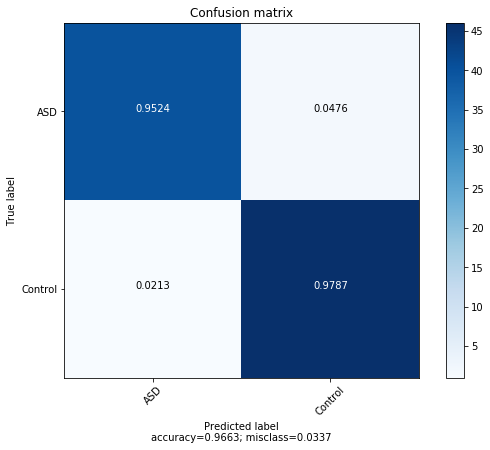

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Test accuracy: {:.2f}%'.format(100*k_nn_gdcv_ref.score(X_te, y_te)))
models_acc['kNN'] = 100*k_nn_gdcv_ref.score(X_te, y_te)
print()

y_pred = k_nn_gdcv_ref.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

In [33]:
# Without refining : 95.51 %
# With refining : 96.63 %

---

## D. SVC model with GridsearchCV

Parameters:
* Scaler : None/scaler
* PCA reduction : n components
* C : Regularization parameter
* gamma : Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
* kernel : Specifies the kernel type to be used in the algorithm

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

SVC = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svc', SVC(random_state=9))
])


param_grid = {
    'scaler': [None, StandardScaler()],
    'pca__n_components':list_pca,
    'svc__C':[0.01, 0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'svc__kernel':['rbf', 'linear'],
}

svc_gdcv = GridSearchCV(SVC, param_grid, cv=3, n_jobs=-1, verbose=1, return_train_score=True)

svc_gdcv.fit(X_tr, y_tr);

svc_results = pd.DataFrame({
    'scale': svc_gdcv.cv_results_['param_scaler'],
    'PCA': svc_gdcv.cv_results_['param_pca__n_components'],
    'kernel':svc_gdcv.cv_results_['param_svc__kernel'],
    'C': svc_gdcv.cv_results_['param_svc__C'],
    'gamma': svc_gdcv.cv_results_['param_svc__gamma'],
    'mean_tr': svc_gdcv.cv_results_['mean_train_score'],
    'mean_te': svc_gdcv.cv_results_['mean_test_score'],
    'std_te': svc_gdcv.cv_results_['std_test_score']
})

svc_results.sort_values(by='mean_te', ascending=False).head(5)

Fitting 3 folds for each of 2700 candidates, totalling 8100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 945 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 1701 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 2729 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3775 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 5569 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 8100 out of 8100 | elapsed:  5.1min finished
C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,scale,PCA,kernel,C,gamma,mean_tr,mean_te,std_te
128,None,2,rbf,1,0.0001,0.954945,0.957746,0.027435
135,None,2,linear,10,0.01,0.953539,0.954930,0.027736
121,None,2,linear,1,1,0.953539,0.954930,0.027736
141,None,2,linear,100,1,0.953539,0.954930,0.027736
139,None,2,linear,10,0.0001,0.953539,0.954930,0.027736


Test accuracy: 95.51%
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        42
           2       0.96      0.96      0.96        47

   micro avg       0.96      0.96      0.96        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.96      0.96      0.96        89



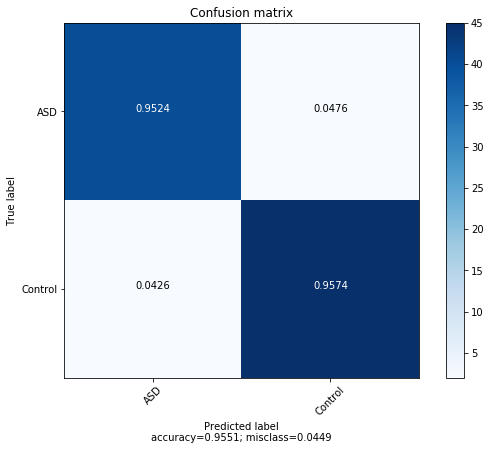

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Test accuracy: {:.2f}%'.format(100*svc_gdcv.score(X_te, y_te)))

y_pred = svc_gdcv.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

### Refine my search with C & gamma 

In [36]:
print('Best score:', svc_gdcv.best_score_)
print('Best estimator:', svc_gdcv.best_estimator_)
print('Best params:', svc_gdcv.best_params_)

Best score: 0.9577464788732394
Best estimator: Pipeline(memory=None,
     steps=[('scaler', None), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=9, shrinking=True,
  tol=0.001, verbose=False))])
Best params: {'pca__n_components': 2, 'scaler': None, 'svc__C': 1, 'svc__gamma': 0.0001, 'svc__kernel': 'rbf'}


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.5s finished
C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


       C        gamma   mean_tr   mean_te    std_te
110    9        1e-05  0.957054  0.957746  0.031902
100    8        1e-05  0.957761  0.957746  0.031902
16   0.7  0.000336667  0.956355  0.954930  0.032302
94     7  0.000227778  0.954947  0.954930  0.032302
90     7        1e-05  0.955646  0.954930  0.034672

Best score: 0.9577464788732394
Best estimator: Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=9, shrinking=True,
  tol=0.001, verbose=False))])
Best params: {'svc__C': 8, 'svc__gamma': 1e-05}


Test accuracy: 95.51%

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        42
           2       0.96      0.96      0.96        47

   micro avg

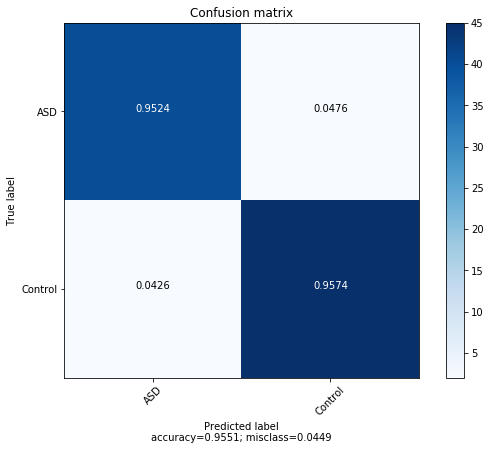

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

SVC_ref = Pipeline([
#     ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('svc', SVC(random_state=9,
               kernel='rbf'))
])


grid_refined = {
#     'scaler': [None, StandardScaler()],
#     'pca__n_components':list_pca,
    'svc__C':[0.5, 0.7, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9],
    'svc__gamma':np.linspace(0.00001, 0.0005, 10),
#     'svc__kernel':['rbf', 'linear'],
}

svc_gdcv_refined = GridSearchCV(SVC_ref, grid_refined, cv=5, n_jobs=-1, verbose=1, return_train_score=True)

svc_gdcv_refined.fit(X_tr, y_tr);

svc_results_refined = pd.DataFrame({
#     'scale': svc_gdcv.cv_results_['param_scaler'],
#     'PCA': svc_gdcv.cv_results_['param_pca__n_components'],
#     'kernel':svc_gdcv.cv_results_['param_svc__kernel'],
    'C': svc_gdcv_refined.cv_results_['param_svc__C'],
    'gamma': svc_gdcv_refined.cv_results_['param_svc__gamma'],
    'mean_tr': svc_gdcv_refined.cv_results_['mean_train_score'],
    'mean_te': svc_gdcv_refined.cv_results_['mean_test_score'],
    'std_te': svc_gdcv_refined.cv_results_['std_test_score']
})

print(svc_results_refined.sort_values(by='mean_te', ascending=False).head(5))
print()
print('Best score:', svc_gdcv_refined.best_score_)
print('Best estimator:', svc_gdcv_refined.best_estimator_)
print('Best params:', svc_gdcv_refined.best_params_)
print()

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print()
print('Test accuracy: {:.2f}%'.format(100*svc_gdcv_refined.score(X_te, y_te)))
models_acc['SVC'] = 100*svc_gdcv_refined.score(X_te, y_te)

y_pred = svc_gdcv_refined.predict(X_te)

print()
report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

<br>
<br>

--- 
--- 

# 5. Conclusion

In [38]:
models_df = pd.Series(models_acc).to_frame('Models')
models_df.sort_values('Models', ascending=False)

,Models
kNN,96.629213
Random forest,95.505618
SVC,95.505618
Decision tree,94.382022
baseline,52.808989


In [39]:
models_df.to_csv('df1_models.csv', index=False, encoding='utf-8')

              precision    recall  f1-score   support

           1       0.98      0.95      0.96        42
           2       0.96      0.98      0.97        47

   micro avg       0.97      0.97      0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



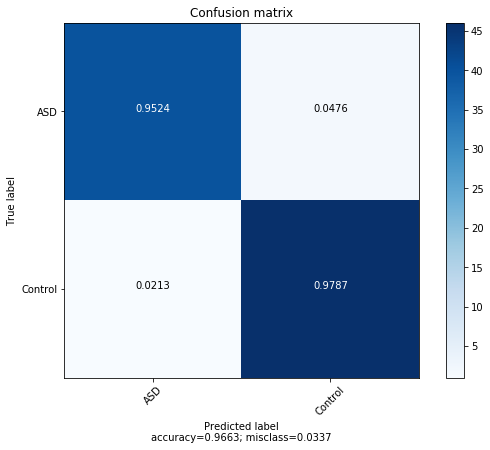

In [40]:
y_pred = k_nn_gdcv_ref.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

I correctly classify autism patients with an accuracy of 96.63% with the kNN model. 
In this confusion matrix we can see that I classify more ASD children as control (0.0476) than I classify control children as ASD (0.0213).

The models have a very good overall accuracy.